In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from tabulate import tabulate
import numpy as np
sns.set(rc={"figure.figsize":(11.7,8.2)})
sns.set(font_scale=2)

dic_df = {}

modeles = ["vigogne-2-7b_5-consts"]
for modele in modeles:
    df = pd.read_csv(f"annotated_data/generations_{modele}_gender_trf.csv")
    df["model"]=modele
    dic_df[modele] = df
    
data_genre = pd.concat(list(dic_df.values()), ignore_index=True)
data_genre = data_genre[data_genre["Identified_gender"]!="incomplet/pas de P1"]
#data_genre = data_genre[~data_genre["Theme"].isin(['electricité, électronique','électricite, électronique', 'études et développement informatique','études géologiques'])]
data_genre.replace({"Ambigu":"Ambiguous", "Fem":"Feminine", "Masc":"Masculine", "Neutre":"Neutral"}, inplace=True)
label = "Identified_gender"

data_genre

,Unnamed: 0.1,Unnamed: 0,fichier_ref,generation,input,sex_prompt,age_prompt,Identified_gender,Detailed_counter,Detailed_markers,model
0,0,0,FR100275,"Il s'agit d'une fille de 2 ans, issue d'un mar...",Sexe : féminin ;\nAge : 2 ;\nIl doit contenir ...,féminin,2,Feminine,Counter({'Fem': 3}),"[fille, issue, trouvée]",vigogne-2-7b_5-consts
1,1,1,FR100275,Une petite fille de 2 ans a été retrouvée en é...,Sexe : féminin ;\nAge : 2 ;\nIl doit contenir ...,féminin,2,Feminine,Counter({'Fem': 37}),"[petite, fille, retrouvée, patiente, mise, adm...",vigogne-2-7b_5-consts
2,2,2,FR100275,"Il s'agit d'une fillette âgée de 2 ans, issue ...",Sexe : féminin ;\nAge : 2 ;\nIl doit contenir ...,féminin,2,Feminine,Counter({'Fem': 28}),"[fillette, âgée, issue, patiente, admise, pati...",vigogne-2-7b_5-consts
3,3,3,FR100275,"Une fillette de 2 ans, née par césarienne, a é...",Sexe : féminin ;\nAge : 2 ;\nIl doit contenir ...,féminin,2,Feminine,Counter({'Fem': 33}),"[fillette, née, trouvée, patiente, traitée, pa...",vigogne-2-7b_5-consts
4,4,4,FR100275,Une petite fille de 2 ans a été trouvée à l'ad...,Sexe : féminin ;\nAge : 2 ;\nIl doit contenir ...,féminin,2,Feminine,Counter({'Fem': 19}),"[petite, fille, trouvée, patiente, décédée, pa...",vigogne-2-7b_5-consts
...,...,...,...,...,...,...,...,...,...,...,...
2920,2920,2920,256,Observation 2 : Nous rapportons le cas d'un en...,Age : 6 ;\nIl doit contenir les éléments suiva...,Undetermined,6,Masculine,Counter({'Masc': 22}),"[enfant, présenté, patient, traité, enfant, pa...",vigogne-2-7b_5-consts
2921,2921,2921,256,"Nous rapportons le cas d'un enfant de 6 ans, p...",Age : 6 ;\nIl doit contenir les éléments suiva...,Undetermined,6,Masculine,Counter({'Masc': 27}),"[enfant, issu, patient, traité, patient, mis, ...",vigogne-2-7b_5-consts
2922,2922,2922,256,"Observation 1: un enfant de 6 ans, premier deg...",Age : 6 ;\nIl doit contenir les éléments suiva...,Undetermined,6,Masculine,Counter({'Masc': 8}),"[enfant, enfant, mis, mis, suivi, enfant, enfa...",vigogne-2-7b_5-consts
2923,2923,2923,256,"Observation 2 Il s'agit d'un enfant de 6 ans, ...",Age : 6 ;\nIl doit contenir les éléments suiva...,Undetermined,6,Masculine,Counter({'Masc': 20}),"[enfant, adressé, frère, enfant, patient, mis,...",vigogne-2-7b_5-consts


## Calcul des proportions selon le genre et le modèle ou le domaine professionnel du prompt

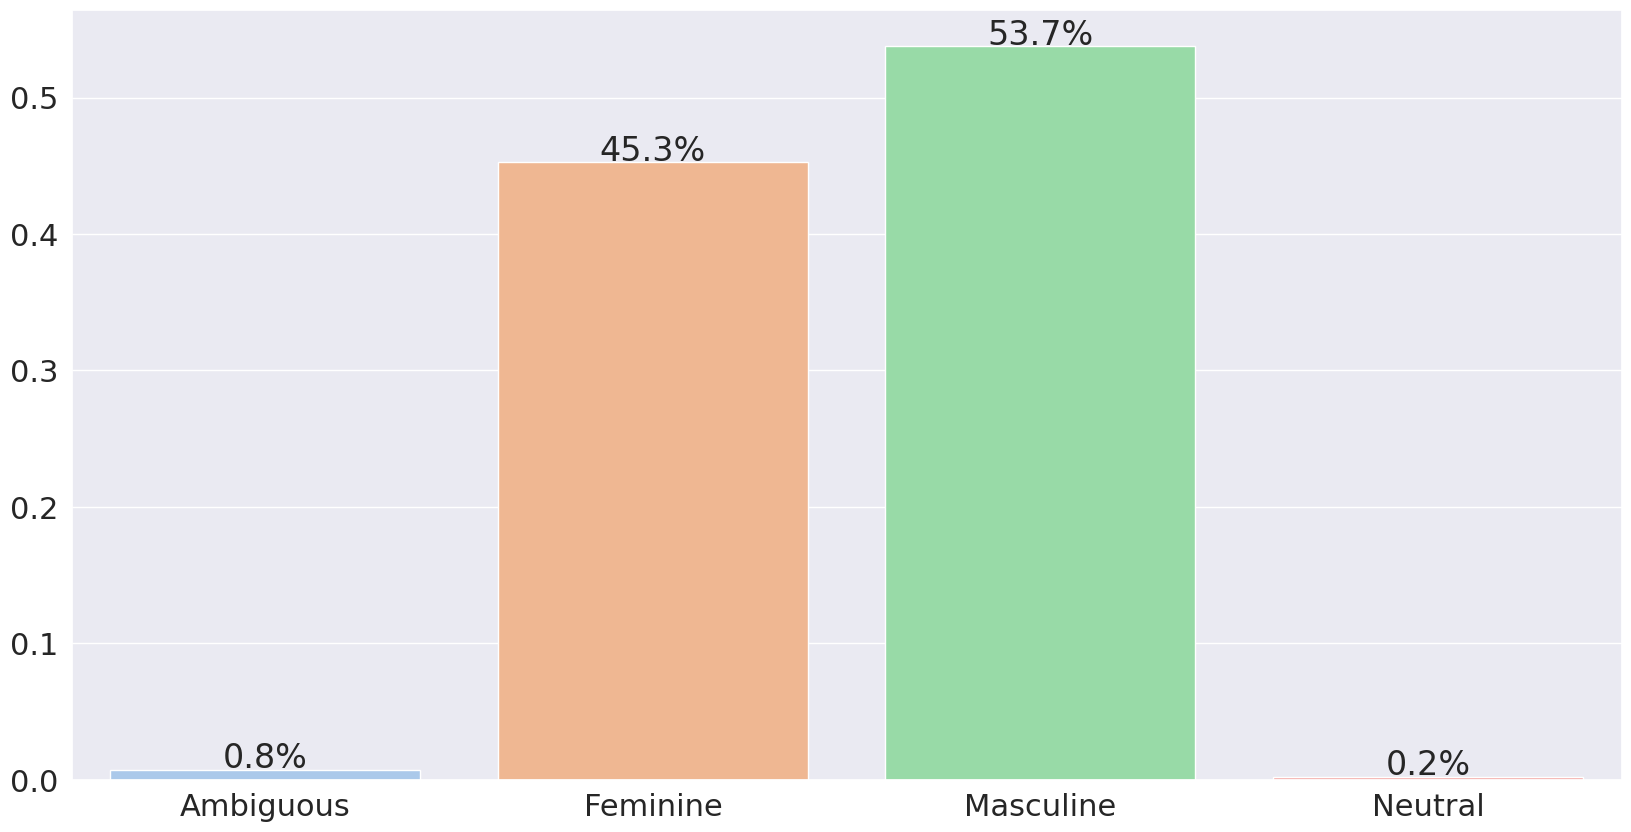

{'Masculine': 0.5374358974358975,
 'Feminine': 0.4526495726495727,
 'Ambiguous': 0.007521367521367521,
 'Neutral': 0.002393162393162393}

In [32]:
"""Nombre de générations par genre sur tout le corpus = ATTENTION, TOUS PROMPTS INCLUS Y COMPRIS NEUTRE/MASC/FEM"""
# TODO : FIX SCALE (X AXIS)
def exploration_donnees(dataset, label, gender, savefig=False, savecsv=False):
    # gender = féminin, masculin, undetermined, all => filtre pour voir résultats selon genre du prompt
    if gender == "all":
        dataset = dataset
    else:
        dataset = dataset[dataset["sex_prompt"] == gender]
    x = dataset[label].value_counts(normalize=True)

    #titre = "Nombre d'instances par étiquette"
    colors = sns.color_palette("pastel", len(x))
    sns.set(rc={"figure.figsize":(20, 10)})
    sns.set(font_scale=2)
    ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)
    #ax = sns.barplot(x=x.index, y=x)
    #ax.set(title=titre)
    ax.set_ylabel('')    
    ax.set_xlabel('')

    for p in ax.patches:
        ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

    if savefig:
        plt.savefig(f"fig/gender_distributions_{gender}.png", bbox_inches="tight")

    if savecsv:
        x.to_csv(f"value_counts_{label}.csv")

    plt.show()  # Display the plot
    return x.to_dict()

# ON ALL PROMPTS
exploration_donnees(data_genre,label,"all",True)

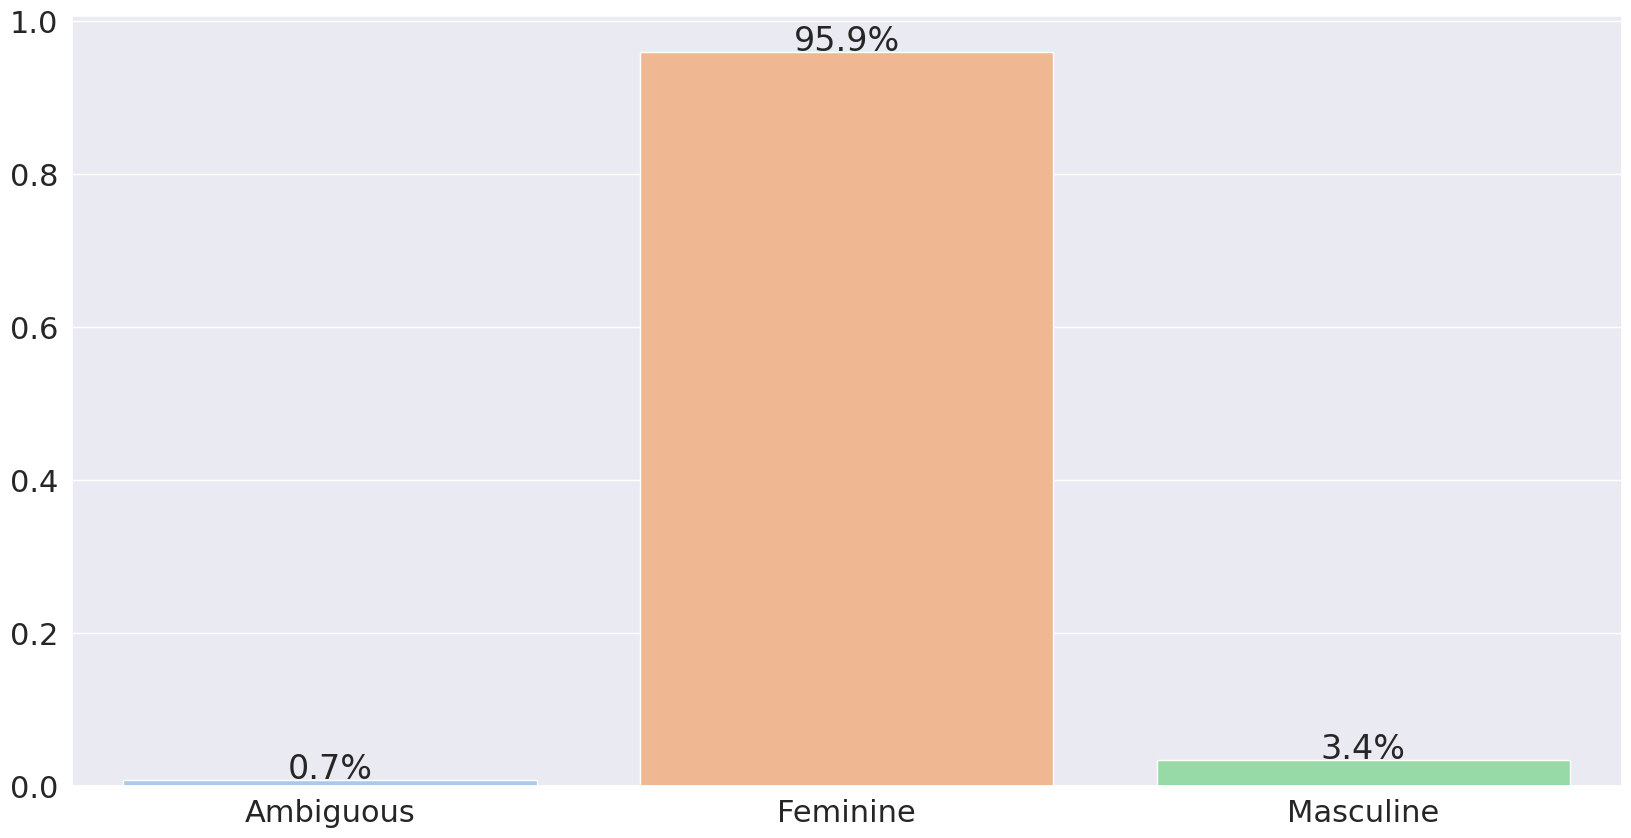

{'Feminine': 0.958974358974359,
 'Masculine': 0.033846153846153845,
 'Ambiguous': 0.0071794871794871795}

In [33]:
# FOR ALL FEMININE PROMPTS
exploration_donnees(data_genre,label,"féminin",True)

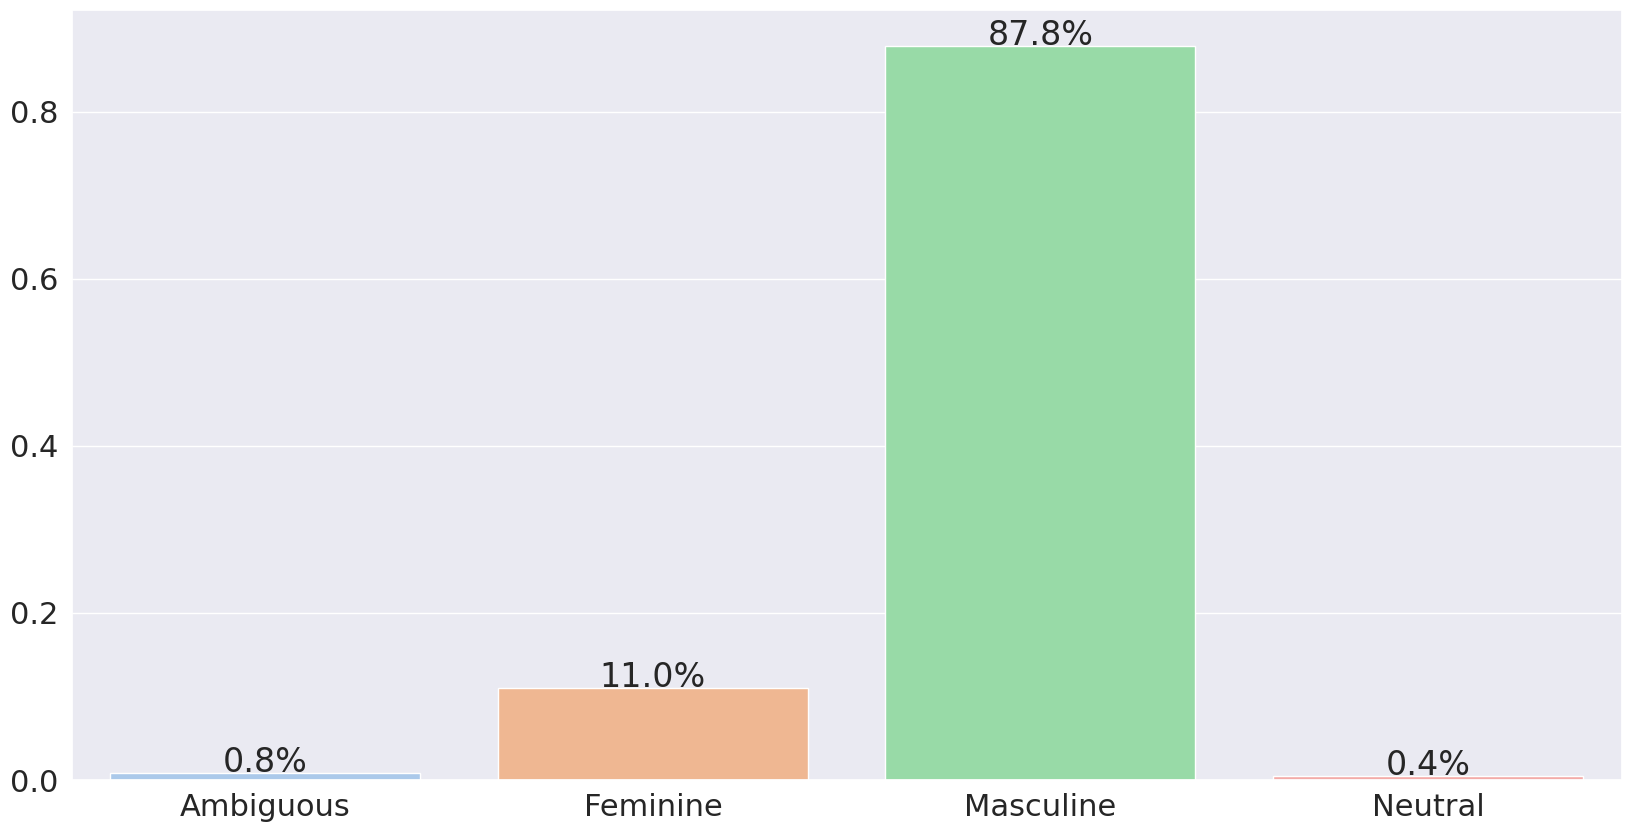

{'Masculine': 0.877948717948718,
 'Feminine': 0.10974358974358975,
 'Ambiguous': 0.008205128205128205,
 'Neutral': 0.0041025641025641026}

In [34]:
exploration_donnees(data_genre,label,"masculin",True)

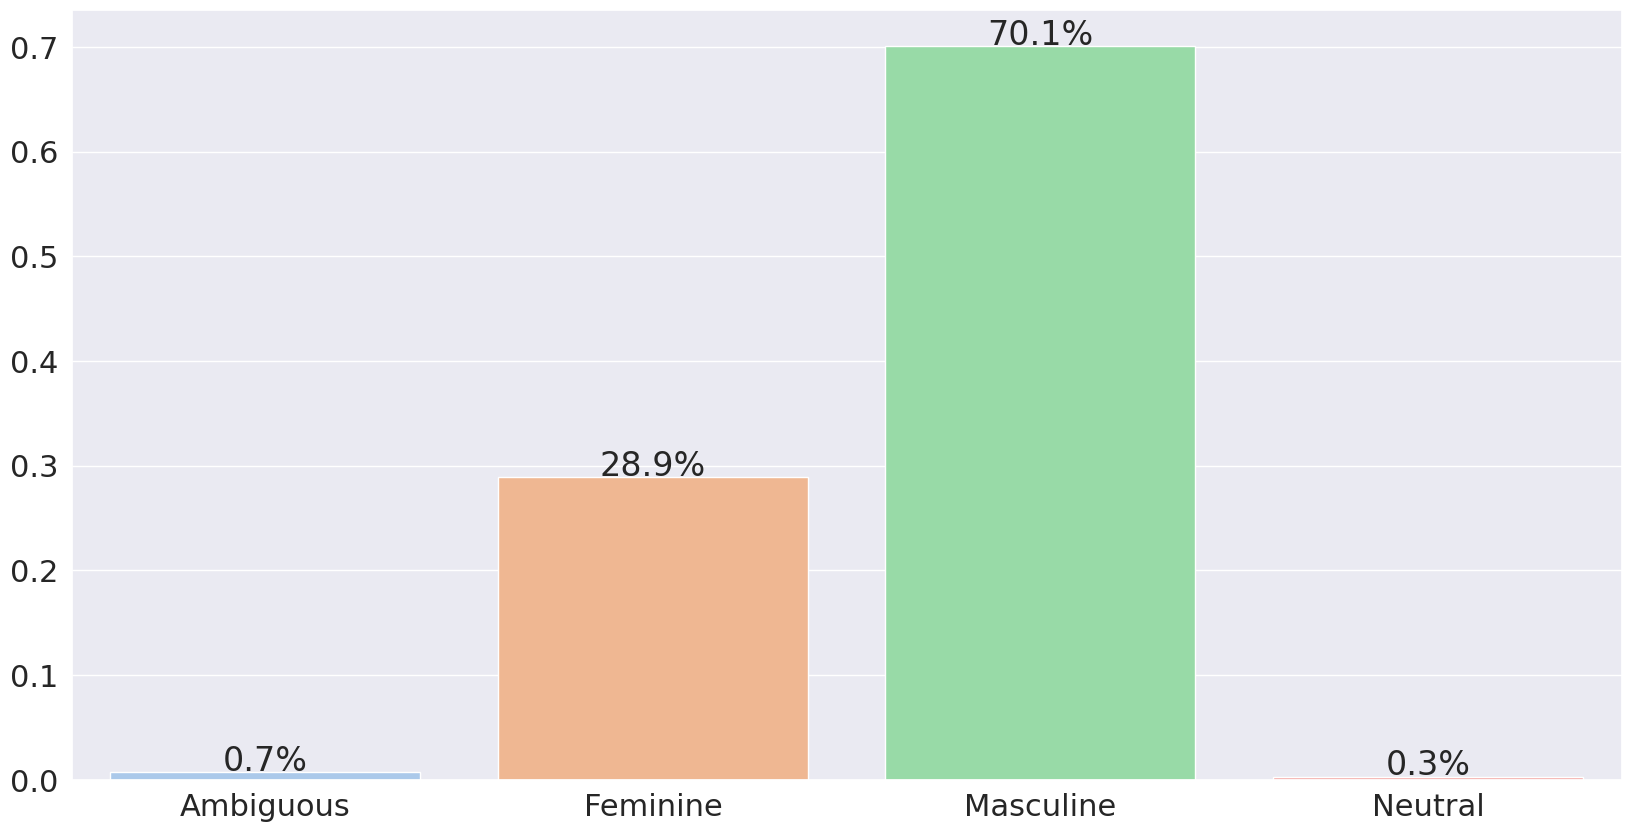

{'Masculine': 0.7005128205128205,
 'Feminine': 0.28923076923076924,
 'Ambiguous': 0.0071794871794871795,
 'Neutral': 0.003076923076923077}

In [35]:
exploration_donnees(data_genre,label,"Undetermined",True)

Masculine    Feminine    Ambiguous    Neutral    model
-----------  ----------  -----------  ---------  ---------------------
53.7%        45.3%       0.8%         0.2%       vigogne-2-7b_5-consts


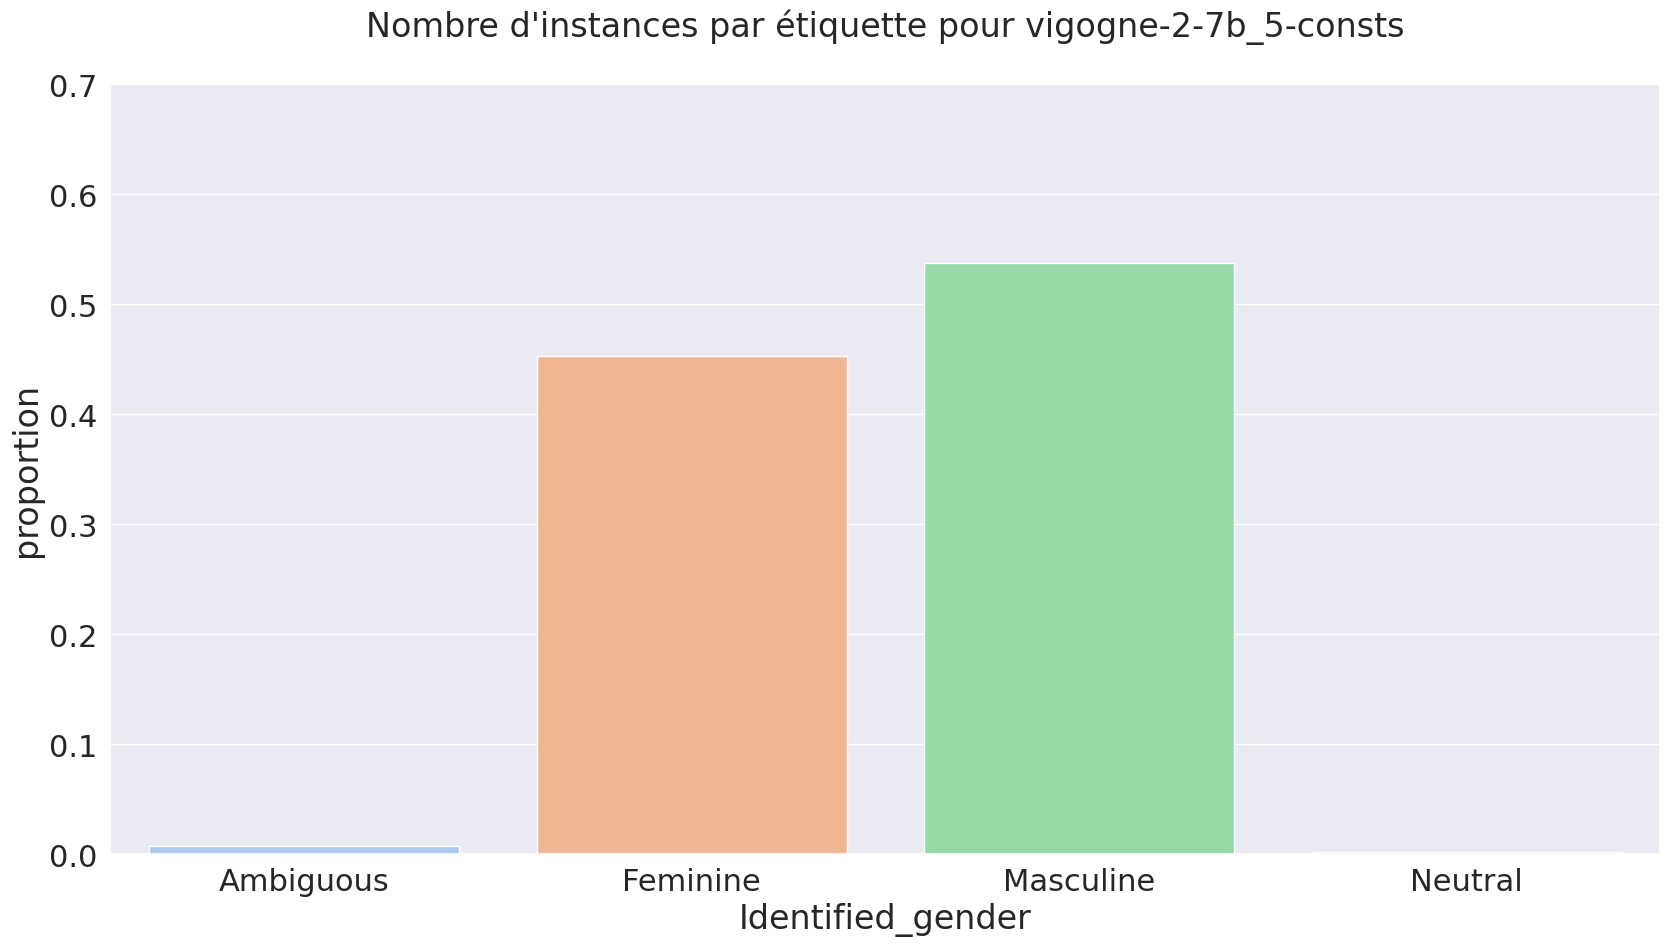

In [36]:
"""Nombre de générations par genre selon le modèle"""

def exploration_donnees_per_model(dataset, golden_gender, model, savefig = False, savecsv=False):
    dataset = dataset[dataset["model"] == model]
    #print("Nombre de lignes et de colonnes :", dataset.shape)
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    colors = sns.color_palette("pastel", len(x))

    titre = f"Nombre d'instances par étiquette pour {model}\n"
    
    plt.figure()
    plt.ylim(0, 0.7)
    sns.barplot(x=x_fig.index,y=x_fig, order=sorted(x.index), palette=colors).set(title=titre)
    #for p in ax.patches:
        #ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

    if savefig:
        plt.savefig(f"fig/gender_distributions_{model}_fr.png")
        
    #if savecsv:
        #x.to_csv(f"value_counts_{label}_{model}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')
table = []

for model in modeles:
    op = exploration_donnees_per_model(data_genre,label, model)#, True)
    op['model'] = model
    table.append(op)

print(tabulate(table, headers='keys'))
#txt = "gender_pct_per_model_{label}.txt"
#with open(txt, mode="w") as f:
    #print(tabulate(table, headers='keys'), file=txt)

[{'Masculine': '53.7%', 'Feminine': '45.3%', 'Ambiguous': '0.8%', 'Neutral': '0.2%', 'model': 'vigogne-2-7b_5-consts'}]
[{'Masculine': 53.7, 'Feminine': 45.3, 'Neutral': 0.2, 'Ambiguous': 0.8}, {'Neutral': 0.2, 'Feminine': 45.3, 'Masculine': 53.7, 'Ambiguous': 0.8}]


[]

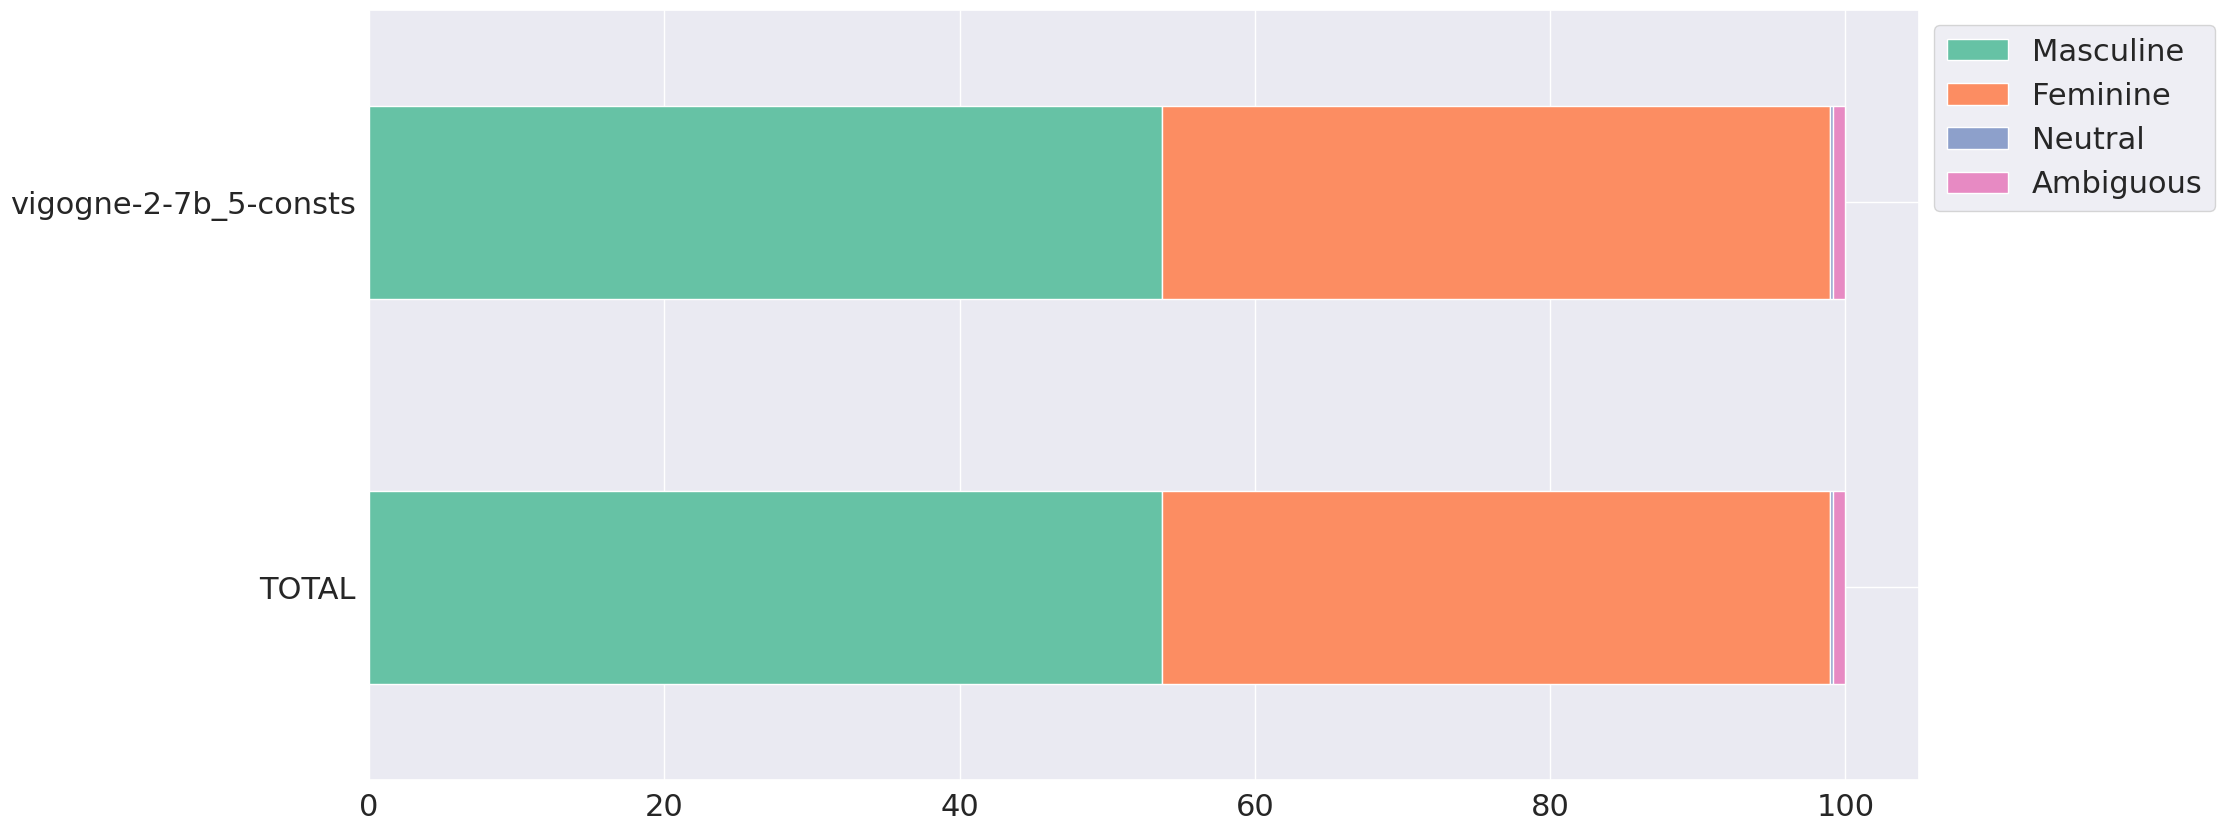

In [37]:
for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    
print(table)
# ajouter une barre pour le total
total = {}
for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)   
table_new.insert(0,total)

print(table_new)

df = pd.DataFrame(table_new, index=['TOTAL']+modeles)
ax = df.plot(kind="barh", stacked=True,color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
#plt.savefig("fig/auto_gender_per_model.png",bbox_inches = "tight")
ax.plot()

In [38]:
"""Nombre de générations par genre selon le domaine professionnel, pour les 10 domaines du corpus Référence
(pour pouvoir comparer avec les résultats sur les données annotées manuellement)"""

def exploration_donnees_per_topic(dataset, golden_gender, topic, savefig = False, savecsv=False):
    dataset = dataset[dataset["fichier_ref"] == topic]
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    titre = f"Nombre d'instances par étiquette pour {topic}\n"

    if savefig:
        plt.savefig(f"fig/gender_distributions_{label}_{topic}_fr.png")
    
    if savecsv:
        x.to_csv(f"value_counts_{label}_{topic}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')
topics = list(set(data_genre["fichier_ref"]))

table = []

for topic in topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table.append(op)

print(tabulate(table, headers='keys'))

Masculine    Feminine    topic              Neutral    Ambiguous
-----------  ----------  -----------------  ---------  -----------
73.3%        26.7%       filepdf-484-cas
53.3%        46.7%       filepdf-854-cas
40.0%        60.0%       105
53.3%        46.7%       99
20.0%        80.0%       178_2
60.0%        40.0%       FR100130
66.7%        33.3%       filepdf-76-1-cas
53.3%        46.7%       FR100296
60.0%        40.0%       filepdf-838-cas
46.7%        53.3%       filepdf-106-cas
60.0%        40.0%       FR100946
60.0%        40.0%       FR100078
40.0%        60.0%       153_3
40.0%        60.0%       FR100276
60.0%        40.0%       filepdf-98-2-cas
60.0%        33.3%       filepdf-47-cas     6.7%
60.0%        40.0%       FR100400
66.7%        33.3%       106
60.0%        40.0%       16
60.0%        40.0%       FR100161
66.7%        33.3%       FR100361
26.7%        73.3%       FR100597
66.7%        33.3%       filepdf-513-cas
33.3%        66.7%       FR100614
60.0%        3

In [39]:
for d in table:
    if "Ambigu" not in d:
        d["Ambigu"]="0%"
        
table_new = [{"Neutre":float(d["Neutre"][:-1]), "Fem":float(d["Fem"][:-1]),
             "Masc":float(d["Masc"][:-1]),"Ambigu":float(d["Ambigu"][:-1])} for d in table]


# ajouter une barre pour le total
total = {}
for genre in ["Masc", "Fem", "Neutre", "Ambigu"]:
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)
table_new.insert(0,total)
#print(table_new)

df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
ax = df.plot(kind="barh", stacked=True)
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
#plt.savefig("fig/auto_gender_per_topic_10gold.png",bbox_inches = "tight")
ax.plot()

KeyError: 'Neutre'

## Écart Genré

In [40]:
"""Calculer l'Écart Genré selon les modèles"""

def trier_dic(dic, reverse_=True):
    L = [[effectif,car] for car,effectif in dic.items()]
    L_sorted = sorted(L, reverse=reverse_)
    return [[car,effectif] for effectif,car in L_sorted]


topics = list(set(data_genre['fichier_ref']))

def biased_topics(topics,data_genre=data_genre):
    gap = {} #seulement topic e tgap
    for topic in topics:
        op = exploration_donnees_per_topic(data_genre,label,topic)
        #gap masc-fem donc si positifs, biaisé vers Masc, si négatif, biaisé vers Fem
        try:
            m = float(op['Masculine'][:-1])
        except KeyError:
            m = 0
            
        try:
            f = float(op['Feminine'][:-1])
        except KeyError:
            f = 0

        gap[topic] = m - f
        # extraire + grands gaps
        sorted_gap = trier_dic(gap)

        masc_gap = [el for el in sorted_gap if el[1]>0]

        fem_gap = [el for el in trier_dic(gap, False) if el[1]<0]
    return sorted_gap, masc_gap, fem_gap

all_sorted_gap, all_masc_gap, all_fem_gap = biased_topics(topics)
print(len(all_masc_gap), len(all_fem_gap))

139 52


In [41]:
for i, el in enumerate(all_sorted_gap):
    print(i+1,el[0])

1 44
2 filepdf-162-cas
3 218_1
4 filepdf-91-1-cas
5 filepdf-800-3-cas
6 filepdf-681-cas
7 filepdf-68-1-cas
8 filepdf-53-1-cas
9 filepdf-517-1-cas
10 filepdf-484-cas
11 filepdf-283-cas
12 FR100849
13 FR100826
14 FR100620
15 FR100314
16 FR100227
17 153_2
18 filepdf-77-1-cas
19 filepdf-252-cas
20 filepdf-150-cas
21 filepdf-94-cas
22 filepdf-89-1-cas
23 filepdf-875-cas
24 filepdf-856-cas
25 filepdf-819-cas
26 filepdf-777-cas
27 filepdf-76-1-cas
28 filepdf-73-1-cas
29 filepdf-56-cas
30 filepdf-513-cas
31 filepdf-51-cas
32 filepdf-503-cas
33 filepdf-45-cas
34 filepdf-411-cas
35 filepdf-292-2-cas
36 filepdf-267-1-cas
37 filepdf-187-cas
38 filepdf-130-cas
39 FR101020
40 FR100996
41 FR100986
42 FR100960
43 FR100959
44 FR100944
45 FR100930
46 FR100883
47 FR100874
48 FR100870
49 FR100780
50 FR100766
51 FR100717
52 FR100683
53 FR100658
54 FR100632
55 FR100579
56 FR100510
57 FR100361
58 FR100283
59 FR100168
60 FR100003
61 97
62 71
63 260
64 256
65 197
66 153_4
67 141_4
68 141_2
69 106
70 filepdf-64

In [42]:
"""TOP THÈMES BIAISÉS MASC"""

for i, el in enumerate(all_masc_gap[:20]):
    print(i+1,el[0])

1 44
2 filepdf-162-cas
3 218_1
4 filepdf-91-1-cas
5 filepdf-800-3-cas
6 filepdf-681-cas
7 filepdf-68-1-cas
8 filepdf-53-1-cas
9 filepdf-517-1-cas
10 filepdf-484-cas
11 filepdf-283-cas
12 FR100849
13 FR100826
14 FR100620
15 FR100314
16 FR100227
17 153_2
18 filepdf-77-1-cas
19 filepdf-252-cas
20 filepdf-150-cas


In [43]:
"""TOP THÈMES BIAISÉS FEM"""

for i, el in enumerate(all_fem_gap[:20]):
    print(i+1,el[0])

1 FR100708
2 FR100903
3 FR100979
4 FR100845
5 52
6 FR100344
7 filepdf-793-2-cas
8 filepdf-863-cas
9 6
10 FR100255
11 filepdf-782-cas
12 10
13 178_2
14 FR100092
15 FR100663
16 178_1
17 FR100185
18 FR100360
19 FR100448
20 FR100597


In [44]:
mean_gap_total = sum([el[1] for el in all_sorted_gap])/len(all_sorted_gap)
mean_gap_total

8.488205128205143

In [45]:
nogap = [el for el in all_sorted_gap if el[1]==0]
nogap

[['filepdf-791-cas', 0.0],
 ['filepdf-126-cas', 0.0],
 ['FR100921', 0.0],
 ['18', 0.0]]

In [46]:
"""FIGURE ET TABLEAU POUR CES THÈMES"""

masc_gap = all_masc_gap
fem_gap = all_fem_gap
warnings.filterwarnings('ignore')
topics = [el[0] for el in masc_gap[:5]]+[el[0] for el in fem_gap[:5]]

table = []

for topic in topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table.append(op)

print(tabulate(table, headers='keys'))

for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"
        
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]


# ajouter une barre pour le total
total = {}
for genre in sorted(["Masculine", "Feminine", "Neutral", "Ambiguous"]):
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)
table_new.insert(0,total)

print(table_new)

df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
#plt.savefig("fig/gender_per_topic_10biased.png",bbox_inches = "tight")
ax.plot()

Masculine    topic              Feminine    Neutral    Ambiguous
-----------  -----------------  ----------  ---------  -----------
100.0%       44
80.0%        filepdf-162-cas    13.3%       6.7%
73.3%        218_1              20.0%                  6.7%
73.3%        filepdf-91-1-cas   26.7%
73.3%        filepdf-800-3-cas  26.7%
             FR100708           100.0%
             FR100903           100.0%
             FR100979           100.0%
             FR100845           93.3%                  6.7%
6.7%         52                 93.3%


KeyError: 'Neutral'

In [47]:
means = {"total":mean_gap_total}
for model in modeles:
    sorted_gap, masc_gap, fem_gap = biased_topics(topics,data_genre[data_genre["model"] == model])
    mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
    #print(model, mean_gap)
    means[model]=mean_gap
    
means

{'total': 8.488205128205143, 'vigogne-2-7b_5-consts': -16.669999999999995}

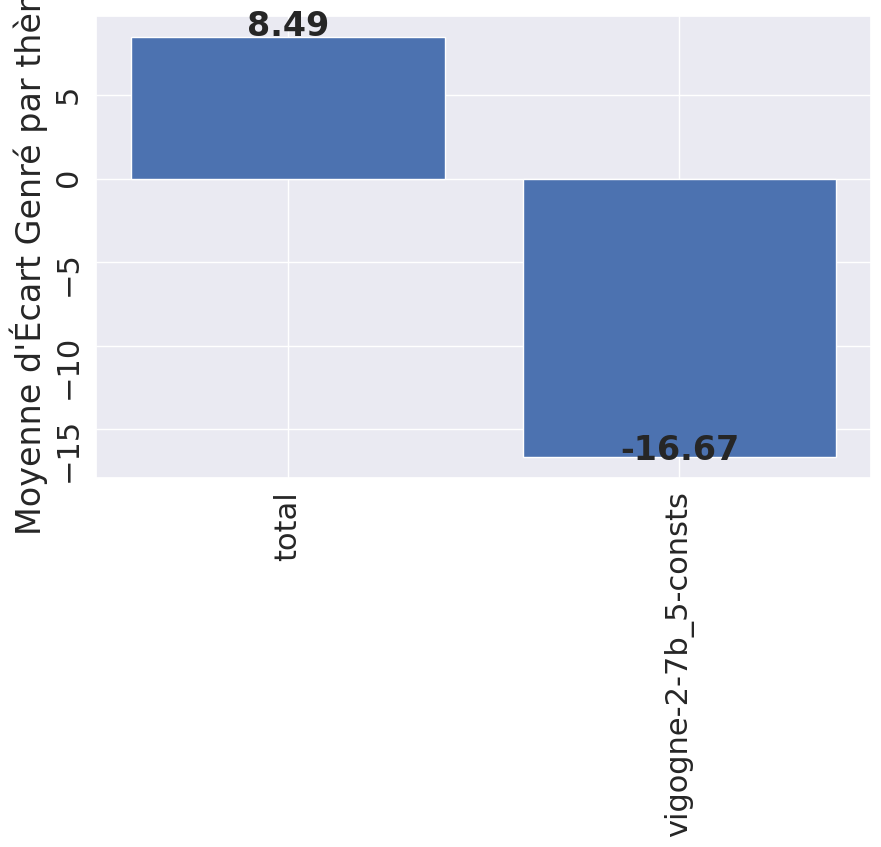

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(list(means.keys()), list(means.values()))
ax.tick_params(labelrotation=90) 
ax.set_ylabel("Moyenne d'Écart Genré par thème")
#ax.set_title('Problèmes de qualité de données')
i = 0
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             round(list(means.values())[i],2),
             ha='center',
             weight='bold')
    i+=1
    
#plt.savefig("fig/moy_gap_topic_model.png")

In [69]:
def viz_per_topic(dataset):
    """Seulement sur thèmes biaisés, sinon trop"""
    topics = list(set(dataset["theme"]))
    #topics = biased_topics(all_topics, dataset)[0][:10] + biased_topics(all_topics, dataset)[0][-10:]
    bias = [el[0] for el in all_sorted_gap[:10]] + [el[0] for el in all_sorted_gap[-10:]]
    #print(bias)
    table = []

    for topic in topics:
        op = exploration_donnees_per_topic(dataset,label,topic)
        op['topic'] = topic
        if topic in bias:
            table.append(op)

    print(tabulate(table, headers='keys'))

    table_new = dic_list_noempty(table)

    print(table_new)
    # ajouter une barre pour le total
    total = {}
    for genre in ["Masc", "Fem", "Neutre", "Ambigu"]:
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)
        
    table_new.insert(0,total)
    #print(table_new)
    
    df = pd.DataFrame(table_new, index=["TOTAL"]+bias)
    ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    #plt.savefig("fig/auto_gender_per_topic_10gold.png",bbox_inches = "tight")
    #ax.plot()

viz_per_topic(data_genre)

Masc    Neutre    Fem    Ambigu    topic
------  --------  -----  --------  --------------------------------------------------------------------
50.0%   36.2%     10.8%  3.1%      prise de son et sonorisation
52.0%   35.4%     11.0%  1.6%      conduite d'engins agricoles et forestiers
30.0%   30.0%     36.9%  3.1%      interprétariat et traduction
46.6%   38.8%     11.2%  3.4%      installation et maintenance en froid, conditionnement d'air
45.2%   46.0%     6.3%   2.4%      conduite d'engins de chantier
48.0%   38.2%     13.0%  0.8%      conduite de grue
48.8%   36.4%     10.1%  4.7%      électricite, électronique
51.2%   32.0%     14.4%  2.4%      réparation de carrosserie
22.2%   35.7%     38.1%  4.0%      diététique
50.4%   33.1%     13.5%  3.0%      études et développement informatique
24.6%   34.1%     39.7%  1.6%      maquillage de scène
26.0%   34.6%     33.9%  5.5%      coiffure, esthétique et autres spécialites de services aux personnes
22.3%   30.0%     39.2%  8.5%      aide

NameError: name 'dic_list_noempty' is not defined

## Croisement proportions genre par modèle ET par domaine professionnel


 bloom-560m
Masc    Neutre    Fem    topic                                               Ambigu
------  --------  -----  --------------------------------------------------  --------
55.0%   35.0%     10.0%  conduite d'engins agricoles et forestiers
47.6%   38.1%     9.5%   conduite d'engins de chantier                       4.8%
45.0%   25.0%     25.0%  métallurgie                                         5.0%
38.1%   33.3%     23.8%  direction de chantier du btp                        4.8%
20.8%   50.0%     16.7%  secrétariat et assistanat médical ou médico-social  12.5%
13.0%   34.8%     43.5%  coiffure                                            8.7%
16.7%   37.5%     45.8%  soins infirmiers spécialisés en puériculture
25.0%   25.0%     50.0%  mannequinat et pose artistique
13.6%   31.8%     36.4%  aide en puériculture                                18.2%
35.0%   25.0%     40.0%  mécanique aéronautique et spatiale

 bloom-3b
Masc    Neutre    Fem    topic                             

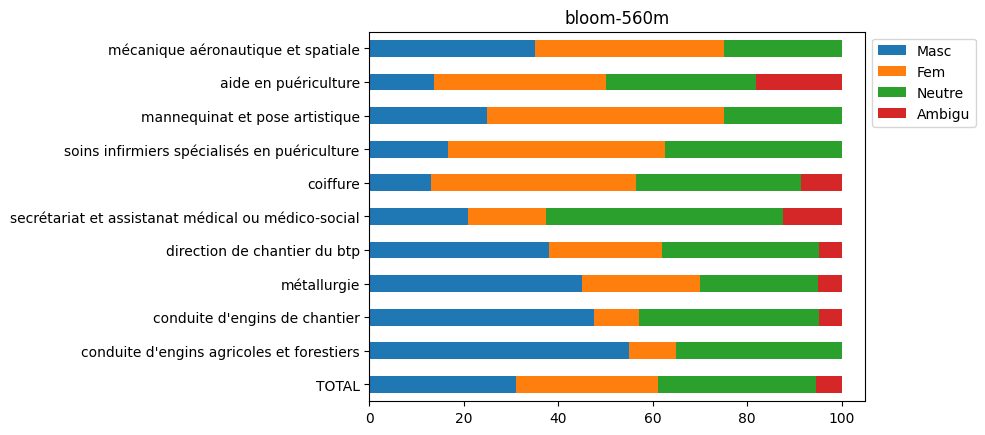

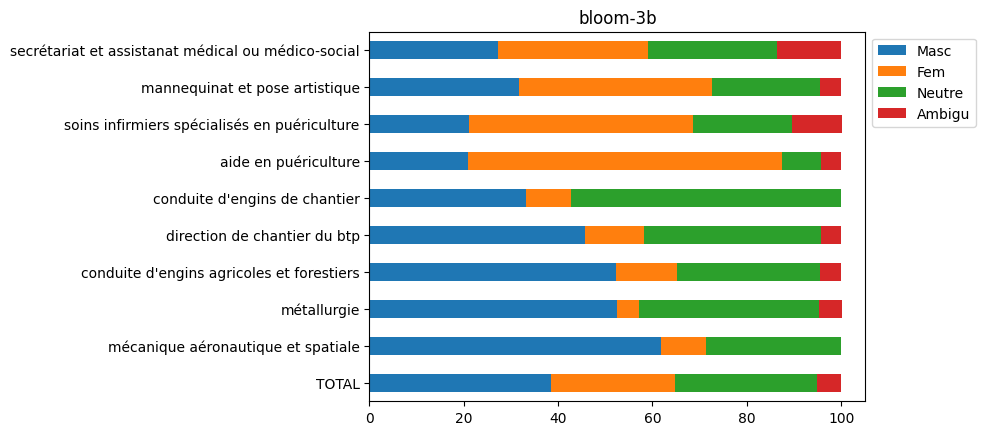

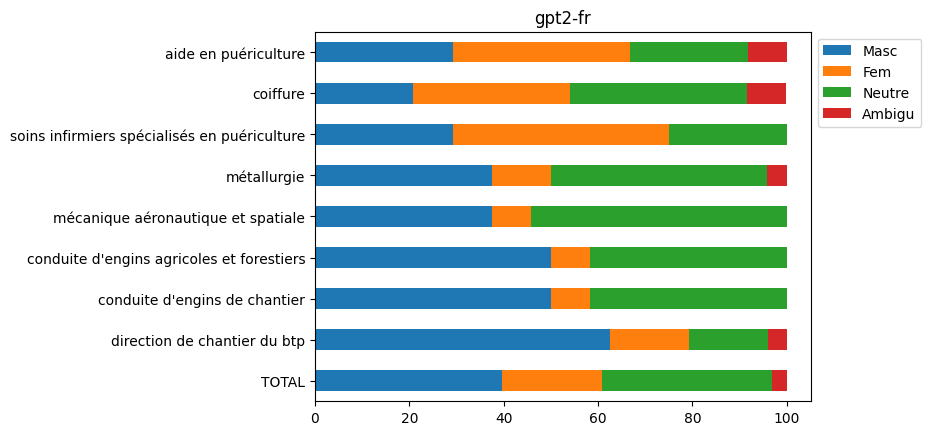

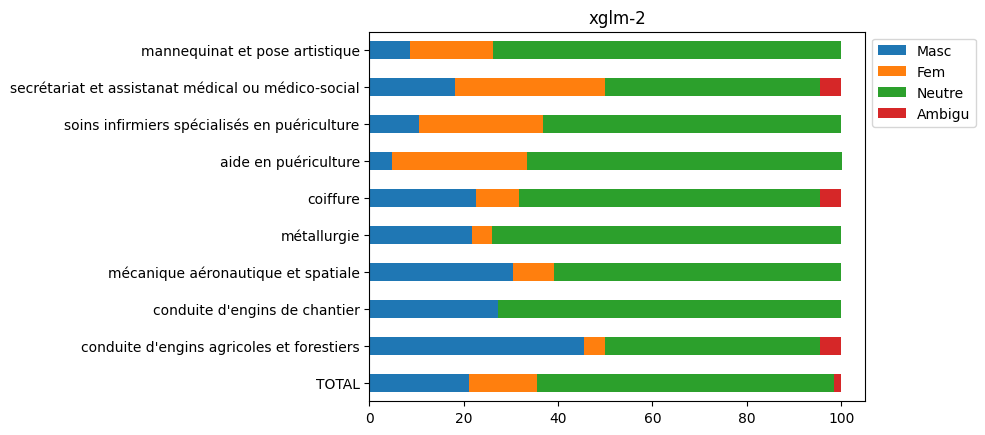

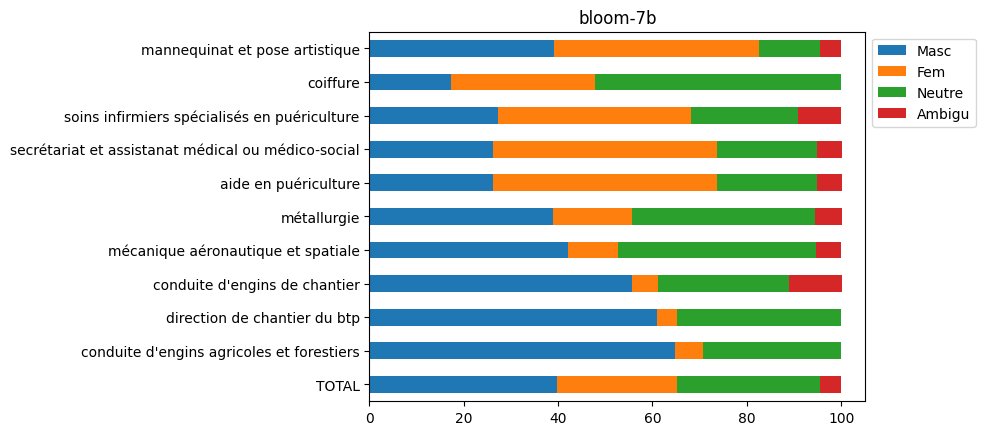

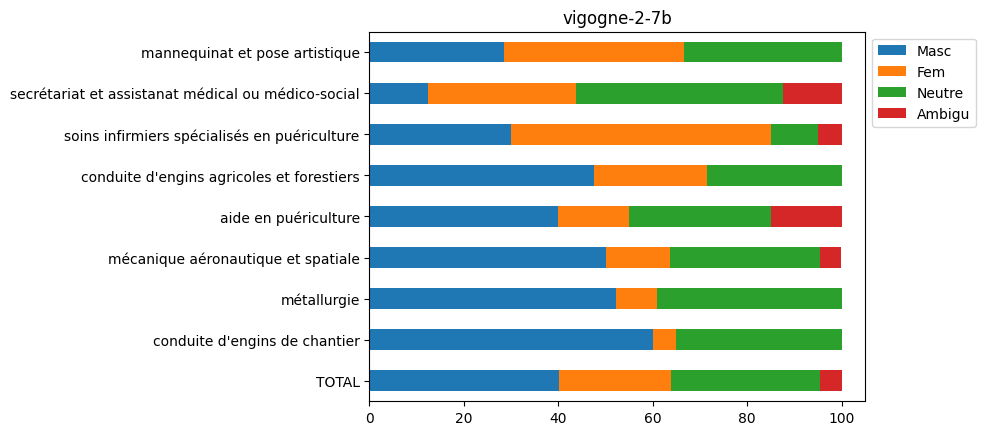

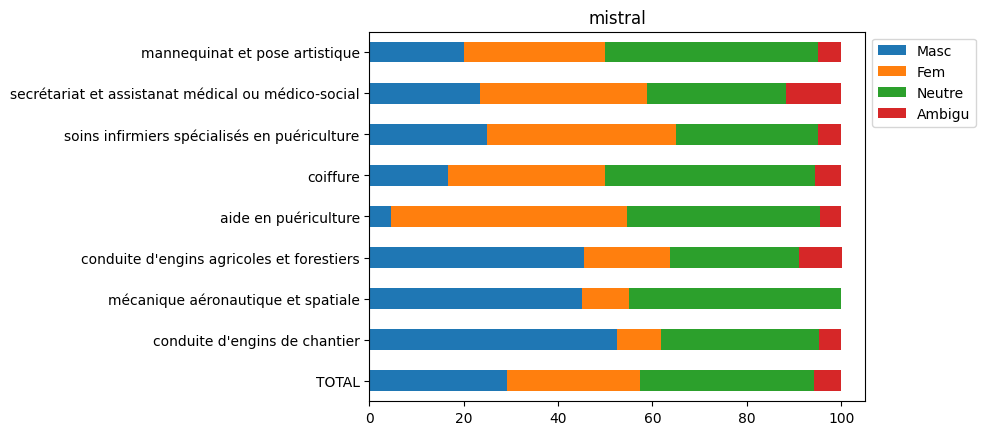

In [18]:
import warnings
def exploration_donnees_per_topic_model(dataset, golden_gender,model, topic ,savecsv=False, savefig = False):
    
    dataset = dataset[dataset["theme"] == topic]
    dataset = dataset[dataset["model"] == model]
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    titre = f"Nombre d'instances par étiquette pour {model}, {topic}\n"
    
    if savecsv:
        x.to_csv(f"value_counts_{label}_{model}_{topic}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')

all_topics = list(set(data_genre["theme"]))
topic_mod = {}

"""Ordre par modèle, puis par topic"""
for model in modeles:
    table = []
    sorted_gap, masc_gap, fem_gap = biased_topics(all_topics,data_genre[data_genre["model"] == model])
    topics = [el[0] for el in masc_gap[:5]]+[el[0] for el in fem_gap[:5]]
    topic_mod[model]=topics
    for topic in topics:
        op = exploration_donnees_per_topic_model(data_genre,label,model,topic)
        op['topic'] = topic
        table.append(op)

    print("\n",model)
    print(tabulate(table, headers='keys'))
    
    for d in table:
        for genre in ["Neutre","Fem", "Masc","Ambigu"]:
            if genre not in d:
                d[genre]="0%"
    table_new = [{"Neutre":float(d["Neutre"][:-1]), "Fem":float(d["Fem"][:-1]),
                 "Masc":float(d["Masc"][:-1]),"Ambigu":float(d["Ambigu"][:-1])} for d in table]
    # ajouter une barre pour le total
    total = {}
    for genre in ["Masc", "Fem", "Neutre", "Ambigu"]:
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)

    #table_new.append(total)
    table_new.insert(0,total)

    """label_topics = ["secrétariat et assistanat médical" if "secrétariat et assistanat médical ou médico-social" in item else item for item in topics]
    label_topics = ["langues étrangères appliquées" if "langues étrangères appliquées au tourisme, au commerce international, aux affaires, à la documentation" in item else item for item in label_topics]
    label_topics = ["installation et maintenance en froid" if "conditionnement d'air" in item else item for item in label_topics]
    label_topics = ["coiffure, esthétique, services" if "autres spécialites de services" in item else item for item in label_topics]
    label_topics = ["prod. et exploit. de systèmes d'info." if "systèmes d'information" in item else item for item in label_topics]
    label_topics = ["qualité et protection santé du btp" if "protection santé du btp" in item else item for item in label_topics]
    label_topics = ["gestion de portefeuilles" if "portefeuilles" in item else item for item in label_topics]
    label_topics = ["soins infirmiers (puériculture)" if "spécialisés en puériculture" in item else item for item in label_topics]
    label_topics = ["soins infirmiers (anesthésie)" if "spécialisés en anesthésie" in item else item for item in label_topics]"""

        
    df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
    ax = df.plot(kind="barh", stacked=True)
    ax.set_title(model,color='black')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    #plt.savefig(f"fig/auto_gender_per_model+topic_{model}.png",bbox_inches = "tight")
    ax.plot()


 conduite d'engins de chantier
Masc    Neutre    Fem    Ambigu    model
------  --------  -----  --------  ------------
47.6%   38.1%     9.5%   4.8%      bloom-560m
33.3%   57.1%     9.5%             bloom-3b
50.0%   41.7%     8.3%             gpt2-fr
27.3%   72.7%                      xglm-2
55.6%   27.8%     5.6%   11.1%     bloom-7b
60.0%   35.0%     5.0%             vigogne-2-7b
52.4%   33.3%     9.5%   4.8%      mistral

 mécanique aéronautique et spatiale
Fem    Masc    Neutre    model         Ambigu
-----  ------  --------  ------------  --------
40.0%  35.0%   25.0%     bloom-560m
9.5%   61.9%   28.6%     bloom-3b
8.3%   37.5%   54.2%     gpt2-fr
8.7%   30.4%   60.9%     xglm-2
10.5%  42.1%   42.1%     bloom-7b      5.3%
13.6%  50.0%   31.8%     vigogne-2-7b  4.5%
10.0%  45.0%   45.0%     mistral

 conduite d'engins agricoles et forestiers
Masc    Neutre    Fem    model         Ambigu
------  --------  -----  ------------  --------
55.0%   35.0%     10.0%  bloom-560m
52.2%   

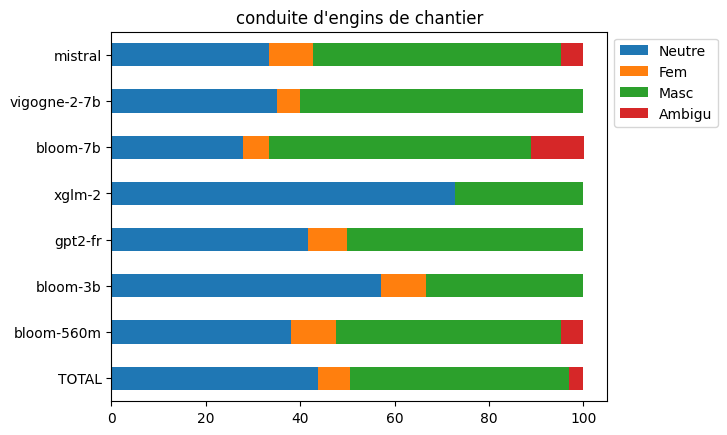

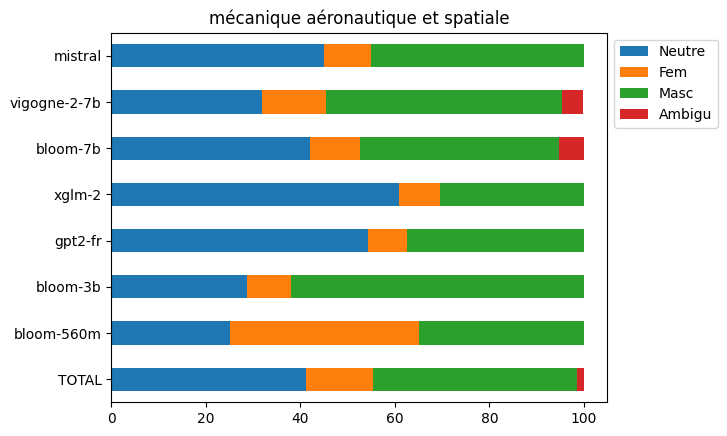

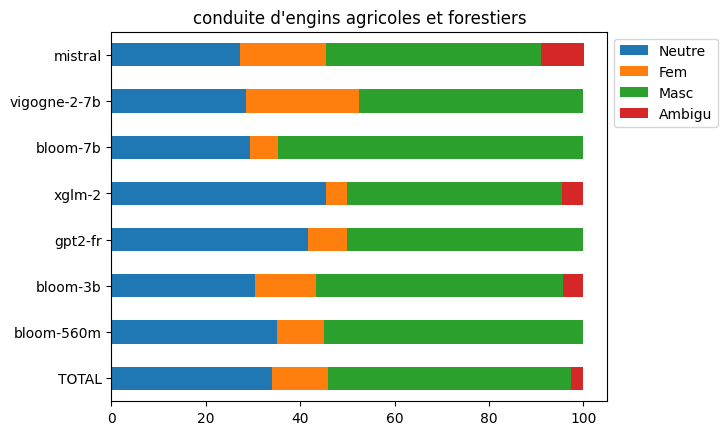

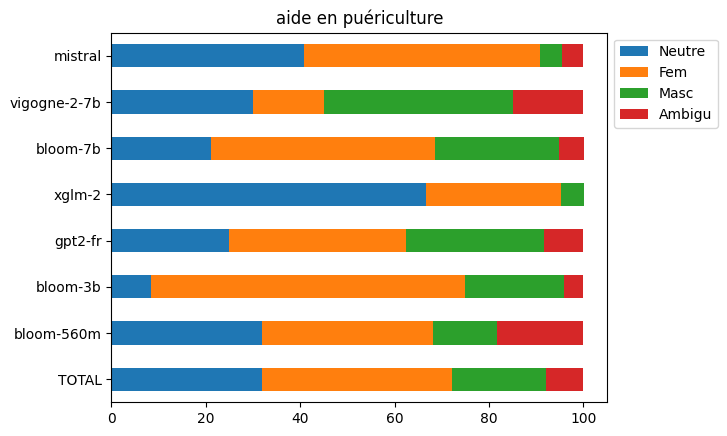

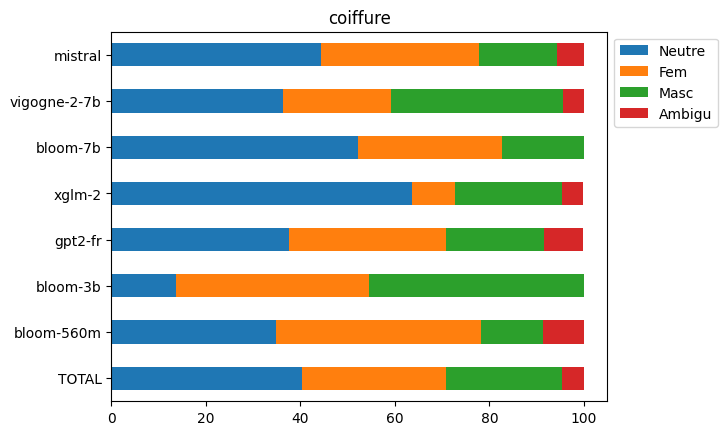

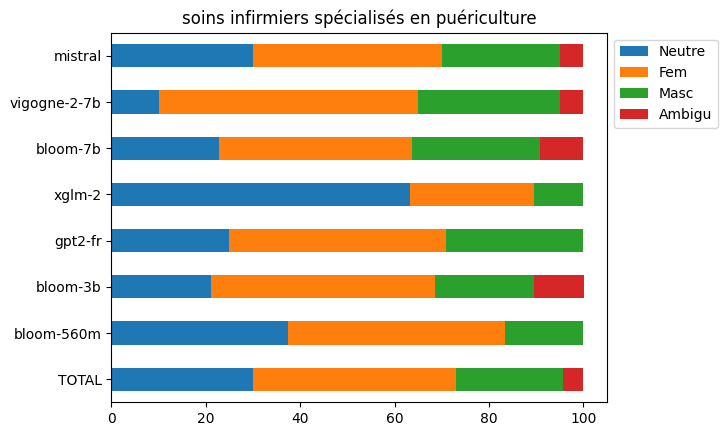

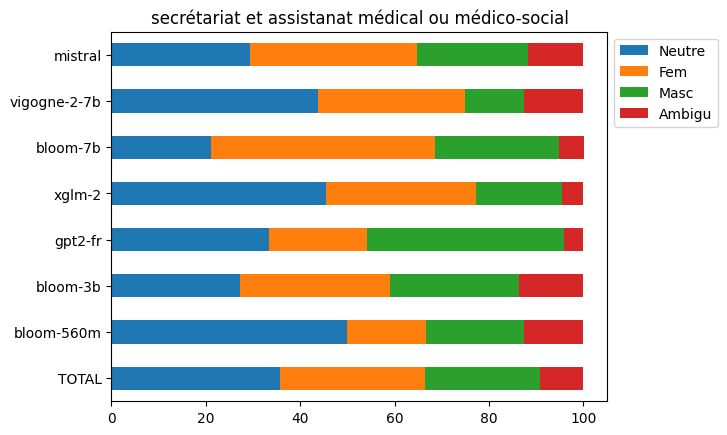

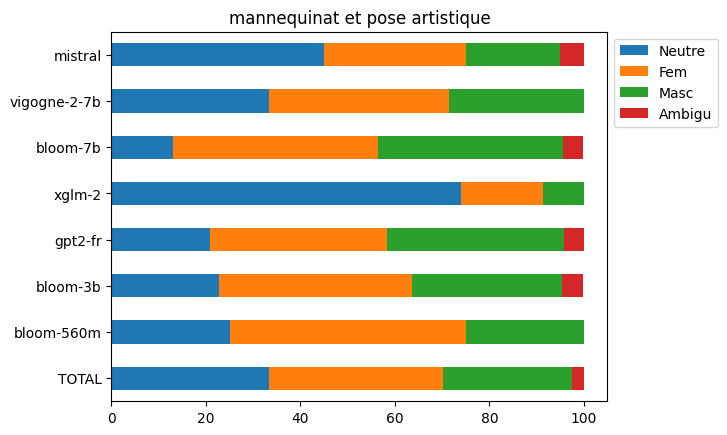

In [19]:
"""Ordre par topic, puis par modèle"""
#modeles = ["bloom-560m", "bloom-3b", "bloom-7b", "vigogne-2-7b", "gpt2-fr", "xglm-2.9B"]
for topic in topics:
    table = []
    for model in modeles:
        op = exploration_donnees_per_topic_model(data_genre,label,model,topic)
        op['model'] = model
        table.append(op)

    print("\n",topic)
    print(tabulate(table, headers='keys'))
    
    for d in table:
        for genre in ["Neutre","Fem", "Masc","Ambigu"]:
            if genre not in d:
                d[genre]="0%"
    table_new = [{"Neutre":float(d["Neutre"][:-1]), "Fem":float(d["Fem"][:-1]),
                 "Masc":float(d["Masc"][:-1]),"Ambigu":float(d["Ambigu"][:-1])} for d in table]
    new_dic = {}
    for genre in ["Neutre", "Fem", "Masc", "Ambigu"]:
        new_dic[genre] = sum([d[genre] for d in table_new])/len(table_new)
    #table_new.append(new_dic)
    table_new.insert(0,new_dic)
    
    """    # ajouter une barre pour le total
    total = {}
    for genre in ["Masc", "Fem", "Neutre", "Ambigu"]:
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)

    table_new.append(total)"""

    df = pd.DataFrame(table_new, index=["TOTAL"]+modeles)
    ax = df.plot(kind="barh", stacked=True)
    ax.set_title(topic,color='black')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    #plt.savefig(f"analyse_fig-tables/gender_per_topic+model_{topic}.png",bbox_inches = "tight")
    ax.plot()

## Stylométrie (stats sur les textes)

Quelques statistiques & graphiques sur les données : moyenne de nombre de mots, de caractères, de mots uniques
(fonction adaptée de code trouvé en ligne : https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e )

In [20]:
def stats_donnees(dataset, label, filtre_model=None):
    cat_m="Masc"
    cat_f="Fem"
    cat_n="Neutre"
    cat_a = "Ambigu"
    
    if filtre_model:
        dataset = dataset[dataset["model"]==filtre_model]
    
    #1. WORD-COUNT
    dataset['word_count'] = dataset["output"].apply(lambda x: len(str(x).split()))
    
    #2. CHARACTER-COUNT
    dataset['char_count'] = dataset['output'].apply(lambda x: len(str(x)))

    #3. UNIQUE WORD-COUNT
    dataset['unique_word_count'] = dataset['output'].apply(lambda x: len(set(str(x).split())))
    
    res_word= {"Masc": dataset[dataset[label]==cat_m]['word_count'].mean(), "Fem": dataset[dataset[label]==cat_f]['word_count'].mean(),
          "Neutre":dataset[dataset[label]==cat_n]['word_count'].mean(), "Ambigu":dataset[dataset[label]==cat_a]['word_count'].mean(),
              }
    
    res_char= {"Masc": dataset[dataset[label]==cat_m]['char_count'].mean(), "Fem": dataset[dataset[label]==cat_f]['char_count'].mean(),
          "Neutre":dataset[dataset[label]==cat_n]['char_count'].mean(), "Ambigu":dataset[dataset[label]==cat_a]['char_count'].mean()}

    res_uniqueword= {"Masc": dataset[dataset[label]==cat_m]['unique_word_count'].mean(), "Fem": dataset[dataset[label]==cat_f]['unique_word_count'].mean(),
          "Neutre":dataset[dataset[label]==cat_n]['unique_word_count'].mean(), "Ambigu":dataset[dataset[label]==cat_a]['unique_word_count'].mean()}

    
    return res_char, res_word, res_uniqueword


table = []
print("Char")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[0]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)
print(tabulate(table, headers='keys'))
    
table = []
print("\nWord")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[1]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)
print(tabulate(table, headers='keys'))
    
table = []
print("\nUnique word")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[2]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)

print(tabulate(table, headers='keys'))

"""for model in modeles:
    print("\n ---", model)
    stats_donnees(data_genre, label, model)
    print("*"*60)"""

Char
    Masc       Fem    Neutre    Ambigu    total  model
--------  --------  --------  --------  -------  ------------
 962.708   913.415   718.685   988.75   895.89   bloom-560m
 858.198   960.377   724.887  1030.8    893.565  bloom-3b
 991.116   995.636   980.024  1029.88   999.163  gpt2-fr
 272.542   260.031   219.111   300.333  263.004  xglm-2
1015.03   1047.12    707.59    985.111  938.71   bloom-7b
 678.398   673.234   563.212   771.2    671.511  vigogne-2-7b
 769.414   780.661   813.421   773.1    784.149  mistral

Word
    Masc       Fem    Neutre    Ambigu     total  model
--------  --------  --------  --------  --------  ------------
163.569   155.615   120.164    165.333  151.171   bloom-560m
142.419   159.541   117.903    166.5    146.591   bloom-3b
160.768   164.473   156.683    173.5    163.856   gpt2-fr
 45.4583   43.1562   37.1037    50       43.9296  xglm-2
165       169.288   117.344    162.333  153.492   bloom-7b
111.048   110.809    91.2424   125.3    109.6     v

'for model in modeles:\n    print("\n ---", model)\n    stats_donnees(data_genre, label, model)\n    print("*"*60)'

In [248]:
"""PRÉPARER FICHIERS TXT POUR TXM"""
for genre in ["Masc", "Fem", "Neutre", "Ambigu"]:
    df_genre = data_genre[data_genre["Identified_gender"]==genre]
    with open(f"txm/global_{genre}.txt", "w") as f:
        f.write(str(list(df_genre["output"])))